In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data plots
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

import os

# Input data files are available in the "./input/" directory.
print(os.listdir("./input"))

# Let's start by loading the dataset
df = pd.read_csv("./input/Admission_Predict_Ver1.1.csv")
df.head(10)

['Admission_Predict.csv', 'Admission_Predict_Ver1.1.csv']


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [2]:
# Changing names because previous names are little bit confusing
df=df.rename(index=str, columns={"GRE Score": "GRE", "TOEFL Score": "TOEFL", "Chance of Admit ": "Admission_Chance"})

# No need for the serial number - non-relevant feature - so its good to drop it
df=df.drop("Serial No.",axis=1)
df.head(10)

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Admission_Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [3]:
# Verification of the dataset and its distribution
df.describe()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Admission_Chance
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [4]:
admit = np.asarray(df["Admission_Chance"])
len(np.unique(admit))
# Admission_Chance columns presents ~60 different unique values in the column

61

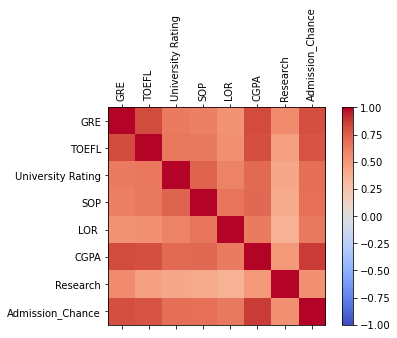

In [5]:
# Analyse the correlation between features
corr = df.corr()

# Plot a correlation heatmap and focus on correlation between admission_chance and features
# Using matplotlib
fig = plt.figure()
ax = fig.add_subplot(111)

cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)

ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)

plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)

plt.show()

<AxesSubplot:>

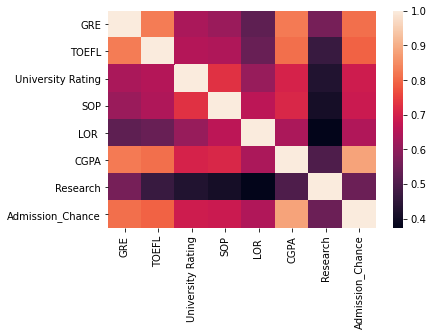

In [18]:
# Analyse the correlation between features
corr = df.corr()

# Plot a correlation heatmap and focus on correlation between admission_chance and features
# Using seaborn
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

C:\Users\osodr\anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\osodr\anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\osodr\anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

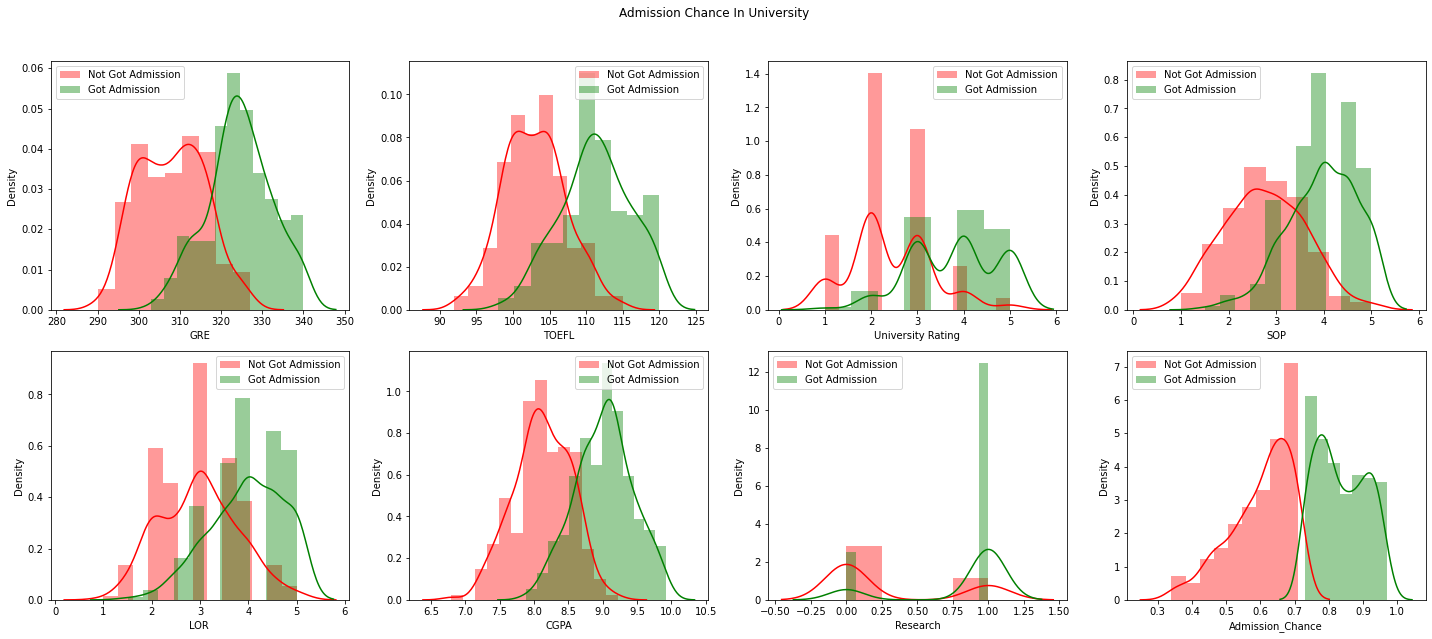

In [19]:
# Let's analyze each dataset feature distribution based on the admission chance of a person
# To make it easier to verify the feature distribution, let's separate admission_chance into ('Not Got Admission', 'Got Admission')
# e.g., admission_threshold: 0.72

admission_threshold = 0.72

fig = plt.figure(figsize = (20, 25))
j = 0
for i in df.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(df[i][df['Admission_Chance'] < admission_threshold], color='r', label = 'Not Got Admission')
    sns.distplot(df[i][df['Admission_Chance'] > admission_threshold], color='g', label = 'Got Admission')
    plt.legend(loc='best')

fig.suptitle('Admission Chance In University ')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

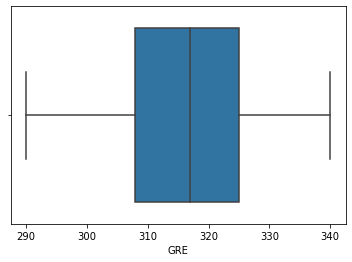

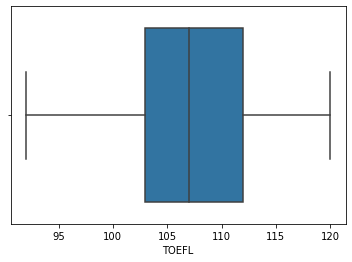

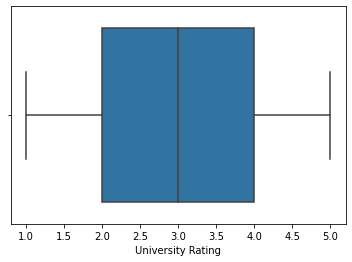

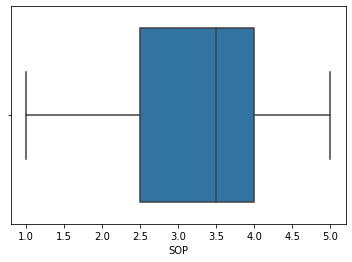

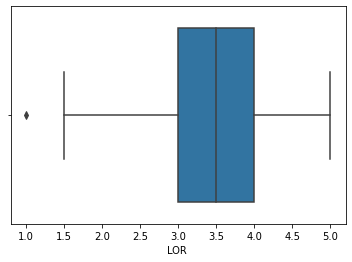

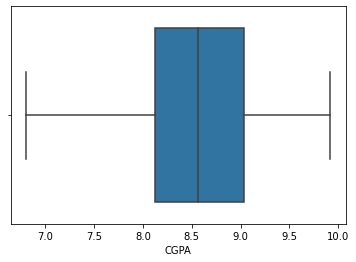

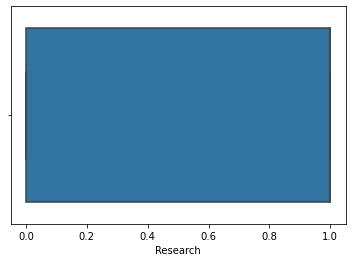

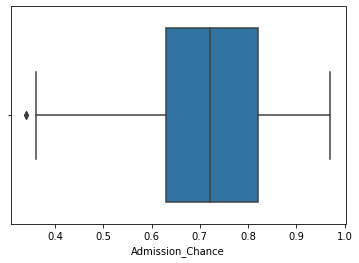

In [8]:
# Analysis of each feature based on box plot
for column in df:
    plt.figure()
    sns.boxplot( x = df[column] )

**thats good we have no outliers**

In [9]:
# Define neural network base model
def build_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=7, activation='relu'))
    #model.add(Dense(8, input_dim=7, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    
    # Compile model
    model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])
    return model

In [10]:
# Separate features and target from dataset
X = np.asarray(df.drop("Admission_Chance",axis=1))
Y = np.asarray(df["Admission_Chance"])

# Make split (80% Train - 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [11]:
# Let's scale the features between [0-1]
scaler =  MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [12]:
# Time to build the model 
model = build_model()
model.summary()

# and fit the model to the dataset
history = model.fit(X_train, y_train, epochs=30, batch_size=3, verbose = 2, validation_data=(X_test, y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
134/134 - 1s - loss: 0.0585 - mae: 0.1772 - mse: 0.0585 - val_loss: 0.0214 - val_mae: 0.1220 - val_mse: 0.0214
Epoch 2/30
134/134 - 0s - loss: 0.0104 - mae: 0.0807 - mse: 0.0104 - val_loss: 0.0115 - val_mae: 0.0887 - val_mse: 0.0115
Epoch 3/30
134/134 - 0s - loss: 0.0066 - mae: 0.0625 - mse: 0.0066 - val_loss: 0.0084 - val_mae: 0.0735 - val_mse: 0.0084
Epoch 4/30
134/134 - 0

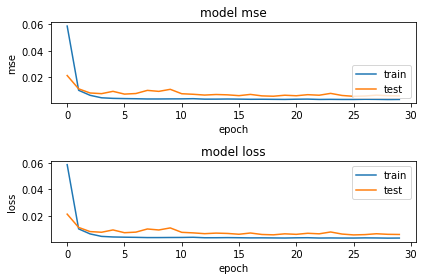

In [13]:
# Plotting the metrics
# MSE
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

# Loss
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [14]:
# Plot training & validation loss values
prediction = model.predict(X_test)

train_error =  np.abs(y_test - prediction)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)

print("\n")
print("std_error: ",std_error)
print("mean_error: ",mean_error)
print("min_error: ",min_error)
print("max_error: ",max_error)



std_error:  0.11978322676679545
mean_error:  0.16788238405942915
min_error:  0.00010756969451908294
max_error:  0.6314824438095092


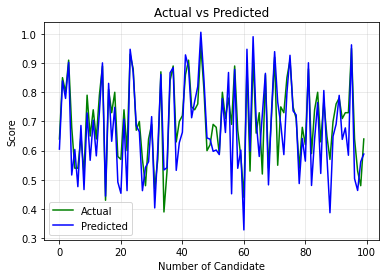

In [15]:
# Visualising the actual and predicted result
plt.plot(y_test, color = 'green', label = 'Actual')
plt.plot(prediction, color = 'blue', label = 'Predicted')
plt.grid(alpha = 0.3)
plt.xlabel('Number of Candidate')
plt.ylabel('Score')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [16]:
# Analyse r_square score comparing predicted values vs real values of test dataset
print("r_square score: ", r2_score(y_test, prediction), "\n\n")

# Pick first and second study case from y_test and compare predicted values vs real values
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(model.predict(X_test[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(model.predict(X_test[[2],:])), "\n\n")

# Analyse r_square score comparing predicted values vs real values of test dataset
train_prediction = model.predict(X_train)
print("r_square score (train dataset): ", r2_score(y_train,train_prediction))

r_square score:  0.6457447335193565 


real value of y_test[1]: 0.85 -> the predict: [[0.8389075]]
real value of y_test[2]: 0.8 -> the predict: [[0.7788968]] 


r_square score (train dataset):  0.8258829516272066


In [17]:
# Save the weights
model.save_weights('model_weights.h5')

# Save the model architecture
with open('model_architecture.json', 'w') as f:
    f.write(model.to_json())